暂退法，在训练过程中丢弃一些神经元，模拟噪声的出现，使神经网络的泛化能力增强 \
多用于训练中的前几层

In [6]:
import torch 
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1   # 链式比较 相当于 (0 <= dropout) and (dropout)
    # 在本情况中, 所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0-dropout)

In [7]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  0.,  0., 12., 14.],
        [ 0., 18.,  0., 22.,  0., 26.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [9]:
# 定义模型参数
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [10]:
# 定义模型
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用暂退法
        if self.training == True:
            # 在第一个全连接层之后添加一个暂退层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个暂退层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out
    
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

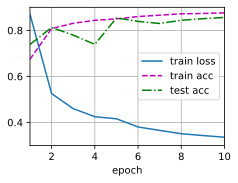

In [11]:
# 训练和测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

简洁实现

In [12]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    # 在第一个全连接层之后添加一个暂退层
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    # 在第二个全连接层之后添加一个暂退层
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10)
                    )

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

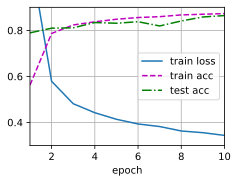

In [13]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

练习

1.交换第一层和第二层的暂退概率

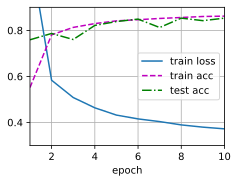

In [14]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    # 在第一个全连接层之后添加一个暂退层
                    nn.Dropout(dropout2),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    # 在第二个全连接层之后添加一个暂退层
                    nn.Dropout(dropout1),
                    nn.Linear(256, 10)
                    )

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

2.不使用暂退法 ———— 训练表现更好，过拟合

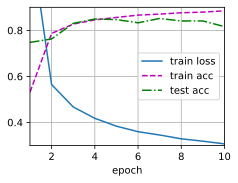

In [15]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10)
                    )

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

3.对比使用或不使用暂退法时，每个隐藏层中激活值的方差是多少？并绘图，按迭代次数，激活值的方差如何变化？

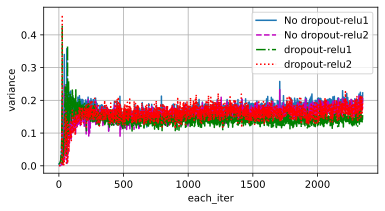

In [ ]:
epochs, lr, batch_size = 10, 0.5, 256
train_iter,_ = d2l.load_data_fashion_mnist(batch_size)
dropouts = [[0, 0], [0.2, 0.5]]  # 第一次不使用暂退法，第二次使用暂退法

variances = []

for dropout in dropouts:
    var_s = [] # 记录所有迭代批次的结果方差
    dropout1 = dropout[0]  # 第一层的丢弃概率
    dropout2 = dropout[1]  # 第二层的丢弃概率
    nets = nn.Sequential(nn.Flatten(),
                nn.Linear(784, 256),
                nn.ReLU(),
                nn.Dropout(dropout1),
                nn.Linear(256,256),
                nn.ReLU(),
                nn.Dropout(dropout2),
                nn.Linear(256,10))
    
    nets.apply(init_weights)
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(nets.parameters(),lr)
    
    for epoch in range(epochs):
        for x, y in train_iter:
            var = []  # 记录两次dropout的结果方差
            for net in nets:
                if type(net) == torch.nn.modules.flatten.Flatten:  # 展平层，初始化out(即展平的图像)
                    out = net(x)
                else:                                              # 非展平层，计算输出结果
                    out = net(out)
                
                if type(net) == torch.nn.modules.activation.ReLU:
                    var.append(float(torch.var(out).detach().numpy()))
                    
            var_s.append(var)
            l = loss(out, y)
            trainer.zero_grad()
            l.mean().backward()
            trainer.step()
    variances.append(var_s)  # 2 * 2350 * 2

import numpy as np

each_iter = np.arange(len(var_s))
variances = np.array(variances)

d2l.plot(each_iter, [variances[0][:,0], variances[0][:,1], variances[1][:,0], variances[1][:,1]],
         'each_iter','variance',
         legend=['No dropout-relu1', 'No dropout-relu2', 'dropout-relu1','dropout-relu2'],
         figsize=(6,3))


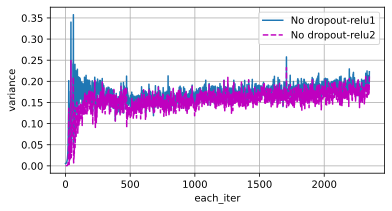

In [33]:
d2l.plot(each_iter, [variances[0][:,0], variances[0][:,1]],
         'each_iter','variance',
         legend=['No dropout-relu1', 'No dropout-relu2'],
         figsize=(6,3))


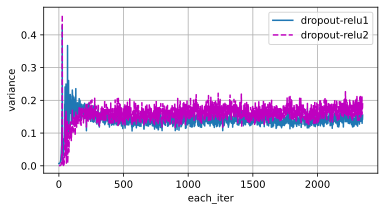

In [34]:
d2l.plot(each_iter, [variances[1][:,0], variances[1][:,1]],
         'each_iter','variance',
         legend=['dropout-relu1','dropout-relu2'],
         figsize=(6,3))

4.暂退法和权重衰减法叠加, 结果变差

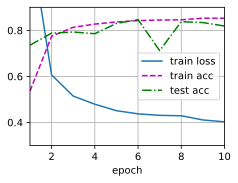

In [41]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    # 在第一个全连接层之后添加一个暂退层
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    # 在第二个全连接层之后添加一个暂退层
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10)
                    )

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=0.001)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)